In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import statsmodels.api as sm

In [2]:
# import dataset
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.shape

(144, 2)

In [4]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
from numpy import log
from datetime import datetime

In [6]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [7]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
dataset.set_index('Month', inplace=True)

In [9]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

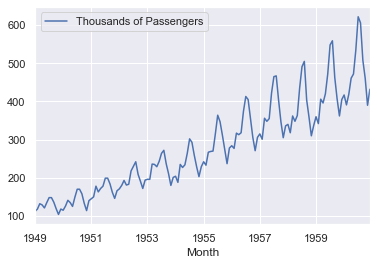

In [10]:
dataset.plot()

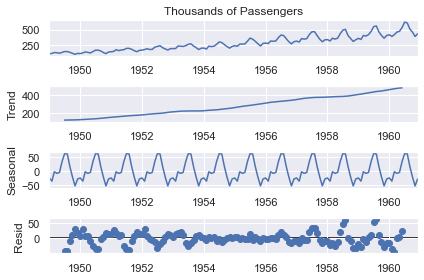

In [11]:
# Decomposition method to check dataset component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'],period = 12)
decomposition.plot()
plt.show()

In [12]:
sm.stats.durbin_watson(dataset)
# Yes, we found there is an autocorrelation avaialbe in my dataset
# there is no point to use linear regression in such cases

array([0.0121528])

In [13]:
# Note : if we don't have non-stationary time series data then we directly use "ARMA" model
# in case we have non-stationary time series then first we make it stationary (manaully) and then will use
    # "ARIMA" model

In [14]:
# Your time series data should be "Stationary"
# How will check - Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ['ADF Test Statistics','p-value','#Lags','No. of Observation']
    
    for a , b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is non-stationary")    

In [16]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistics : 0.8153688792060543
p-value : 0.9918802434376411
#Lags : 13
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [17]:
# in case we have non-stationary time series data then we have to make it stationary by the help of lag function
dataset['1st Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)

In [18]:
dataset.head(20)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [19]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -2.8292668241700034
p-value : 0.054213290283824954
#Lags : 12
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [20]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [21]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [22]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags : 11
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [23]:
# AIC = -2LL + 2K
# K = Parameter (pdq - Trend and PDQ - Seasonality)
# p/P - partial autocorrelation (AutoRegressive method)
# d/D - Lag Difference(Integrated method) - in case we have non-stationary data
# q/Q - AutoCorrelation (Moving Avg)
# ARIMA - AutoRegressive Integrated Moving Avg
# p = ?
# d = 2
# q = ?

# P = ?
# D = ?
# Q = ?

In [24]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [25]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [26]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [27]:
# d = 2
# D = 1

# p/P and q/Q = ?
# p(Trend)/P(Seasonality) - AutoRegressive method (Partial Auto correlation)
# q(Trend)/Q(Seasonality) - Moving Avg (AutoCorrelation)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

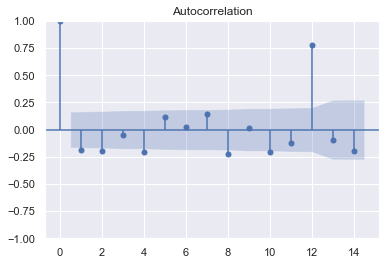

In [29]:
plot_acf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

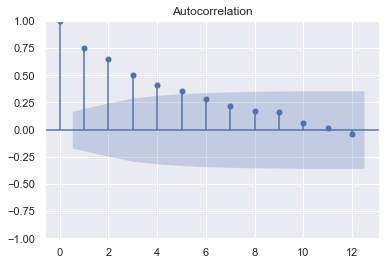

In [30]:
plot_acf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

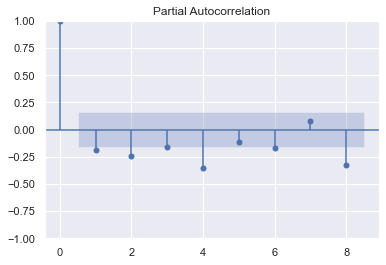

In [31]:
plot_pacf(dataset['2nd Diff'].dropna(), lags=8)
plt.show()

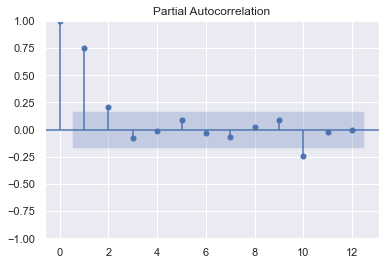

In [32]:
plot_pacf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

In [33]:
# Trend
# p = 4
# d = 2
# q = 2

# Seasonality
# P = 2
# D = 1
# Q = 5

# Building Time Series Foresting basis ARIMA Model

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [35]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(4, 2, 2),
                                  seasonal_order=(2, 1, 5, 12))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
result = model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.731
Date:                                          Tue, 11 Oct 2022   AIC                           1021.461
Time:                                                  08:19:55   BIC                           1061.607
Sample:                                              01-01-1949   HQIC                          1037.774
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [38]:
# [1, 2, 3, 4, 5]
# Q = 5, AIC = 1021.461
# Q = 4, AIC = 1020.041
# Q = 3, AIC = 1018.484
# Q = 2, AIC = 1017.565
# Q = 1, AIC = 1015.567

In [39]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(0, 0, 0), seasonal_order=(0, 3, 3, 12))
result = model.fit()
print(result.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 3, [1, 2, 3], 12)   Log Likelihood                -499.803
Date:                          Tue, 11 Oct 2022   AIC                           1007.607
Time:                                  08:20:04   BIC                           1018.335
Sample:                              01-01-1949   HQIC                          1011.957
                                   - 12-01-1960                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.5379    183.748     -0.008      0.993    -361.677     358.602
ma.S.L24       0.6501     98.783      0.007      0.

In [40]:
# AutoArima approach - iteration approach

import itertools
p = d = q = range(0,4) # max value would be highest
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print("Check few parameter combination :")
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))

print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                              order= param, seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}X{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue            

In [41]:
# ARIMA(0, 0, 0)X(0, 3, 3, 12) - AIC:697.8952307840076

In [42]:
# validate whether your model perform well or not

In [43]:
len(dataset)

144

In [44]:
dataset.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


<AxesSubplot:xlabel='Month'>

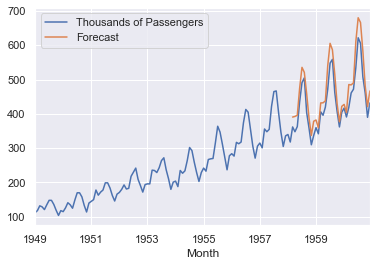

In [47]:
dataset['Forecast'] = result.predict(start=110, end=144, dynamic = True)
dataset[['Thousands of Passengers','Forecast']].plot()

In [46]:
# predict 5 years passengers details
# 1st Jan 1961 to 1st Dec 1965

In [48]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,666.502414
1960-09-01,508,-98.0,-82.0,45.0,583.759169
1960-10-01,461,-47.0,51.0,54.0,481.680988
1960-11-01,390,-71.0,-24.0,28.0,421.242152
1960-12-01,432,42.0,113.0,27.0,466.886282


In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,61)]

In [51]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [52]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns = dataset.columns)

In [53]:
future_dates_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [54]:
future_df = pd.concat([dataset, future_dates_df])

In [55]:
future_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [58]:
future_df.tail(65)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1960-08-01,606,-16.0,-103.0,47.0,666.502414
1960-09-01,508,-98.0,-82.0,45.0,583.759169
1960-10-01,461,-47.0,51.0,54.0,481.680988
1960-11-01,390,-71.0,-24.0,28.0,421.242152
1960-12-01,432,42.0,113.0,27.0,466.886282
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

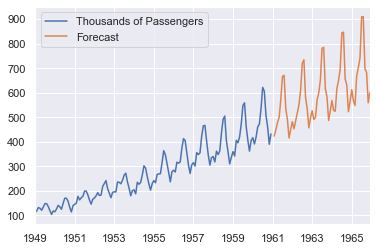

In [59]:
future_df['Forecast'] = result.predict(start=145, end=204, dynamic = True)
future_df[['Thousands of Passengers','Forecast']].plot()

In [60]:
future_df.tail(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1964-05-01,NaN,NaN,NaN,NaN,649.950350
1964-06-01,NaN,NaN,NaN,NaN,695.442462
1964-07-01,NaN,NaN,NaN,NaN,843.890597
1964-08-01,NaN,NaN,NaN,NaN,846.876255
1964-09-01,NaN,NaN,NaN,NaN,656.598093
1964-10-01,NaN,NaN,NaN,NaN,631.674187
1964-11-01,NaN,NaN,NaN,NaN,522.627144
1964-12-01,NaN,NaN,NaN,NaN,564.416860
1965-01-01,NaN,NaN,NaN,NaN,612.489712
1965-02-01,NaN,NaN,NaN,NaN,568.067140


In [61]:
future_df.to_csv("my_prediction_timeseries.csv")

# This is all about for this project